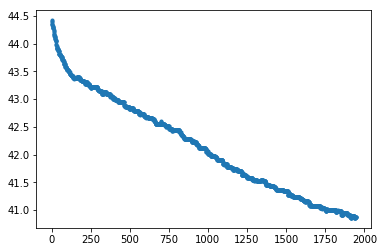

系数a: 1.2155423132788994
系数b: 0.01139372780472702
系数c: 43.16322915444008


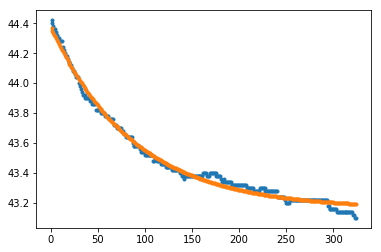

系数a: 2.41315176825641
系数b: 0.0011477483744177191
系数c: 41.487144176907336


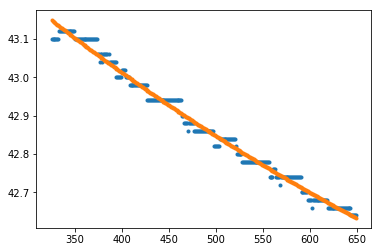

系数a: 3085.067245138041
系数b: 5.239826796016394e-07
系数c: -3041.373188175294


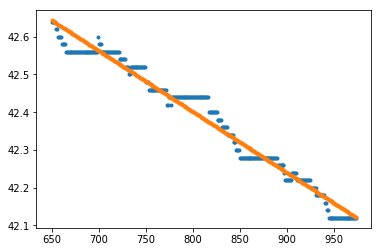

系数a: 5.816508799814918
系数b: 0.0013212022331588042
系数c: 40.49486444487934


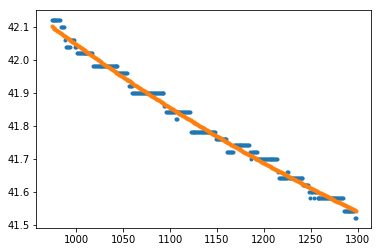

系数a: 1218.2627849796952
系数b: 1.00871812848896e-06
系数c: -1175.101177580088


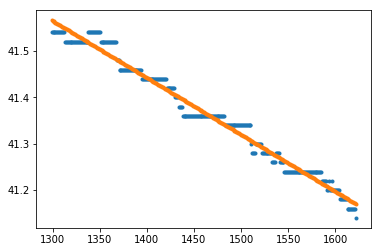

系数a: 4.679501904875232
系数b: 0.0009721490427412903
系数c: 40.17625745181134


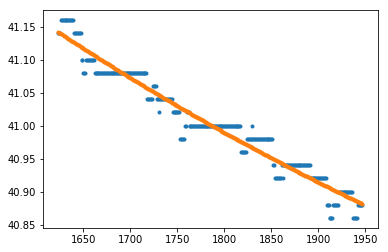

[0.01139372780472702, 0.0011477483744177191, 5.239826796016394e-07, 0.0013212022331588042, 1.00871812848896e-06, 0.0009721490427412903]
系数a: 5.867767650403146
系数b: 0.00037341811392683697
系数c: 37.98296659403652


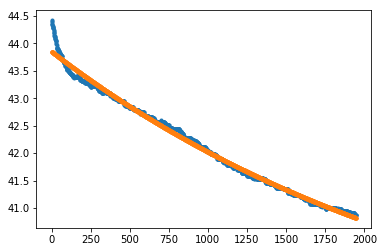

In [4]:
guessb = 10**(-3)
ac=6 #分割找數據段數
import numpy as np
fp = open('5.txt','r',encoding='UTF-8')

a = []
for line in fp:
    a.append(list(line.strip('\n').split(',')))
b = a[1:]
n = 0
data= []
for x in b:
    x = float(b[n][1][5:10])
    data.append(x)
    n = n+1


import matplotlib.pyplot as plt
import numpy as np
l = len(data) #數據總數
x = np.linspace(1,l, l)
plt.plot(x, data,'.')
plt.show()

from scipy import optimize

def func(x, a, b, c):
    return a*np.exp(-b*x)+c
x=np.linspace(1,l,num=l)
np_data = np.array(data)


b = []


for i in range (ac) :
    dataa=np_data[int(l/ac*i):int(l/ac*(i+1))]
    xa=x[int(l/ac*i):int(l/ac*(i+1))]
    #print(xa)
    #print(dataa)
    plt.plot(xa,dataa, '.')
    popt, pcov = optimize.curve_fit(func, xa, dataa, maxfev=1000000, p0=(5, guessb, 40))
    a=popt[0]
    b.append(popt[1])
    c=popt[2]
    print (u'系数a:', a)
    print (u'系数b:', b[i])
    print (u'系数c:', c)
    yvals = func(xa,a,b[i],c)
    plt.plot(xa, yvals, '.')
    plt.show()

print(b)
index = []
for i in range (ac):
    if((abs(b[i]) < 5*guessb)and((abs(b[i])>guessb/5))):
        index.append(i)
st = int(l/ac*max(0,(min(index)-1)))
end = int(l/ac*min(ac,(max(index)+2)))
datab = np_data[st:end]
xb = np.linspace(1, len(datab), len(datab))
plt.plot(xb, datab, '.')

popt, pcov = optimize.curve_fit(func, xb, datab, maxfev=1000000, p0=(5, guessb, 40))
a=popt[0]
b=popt[1]
c=popt[2]
yvals = func(xb,a,b,c)
print (u'系数a:', a)
print (u'系数b:', b)
print (u'系数c:', c)
plt.plot(xb, yvals, '.')
plt.show()